In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from numpy.fft import fft2, fftshift
import os

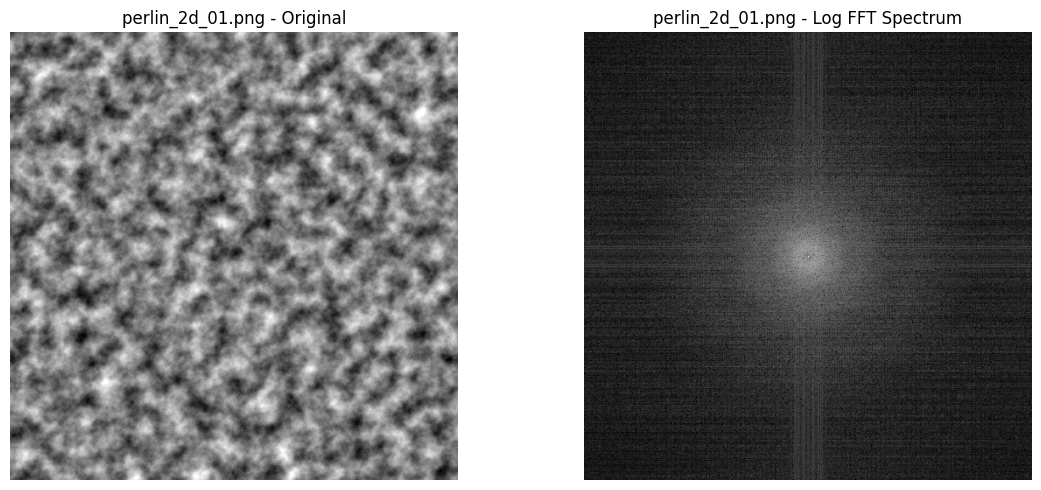

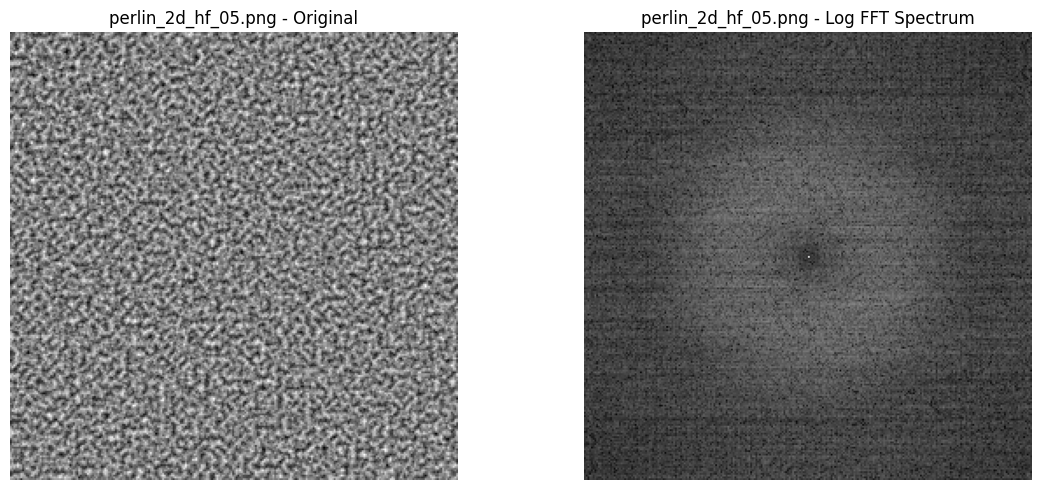

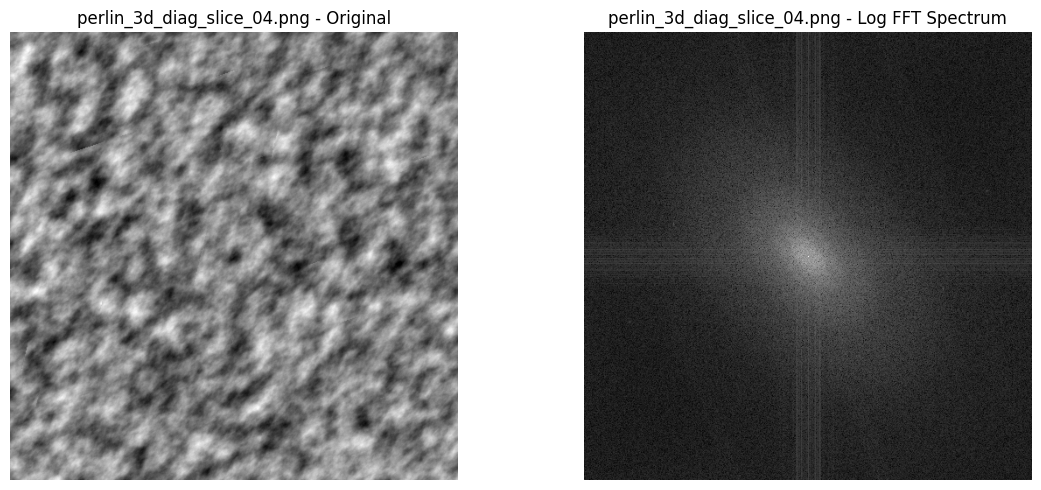

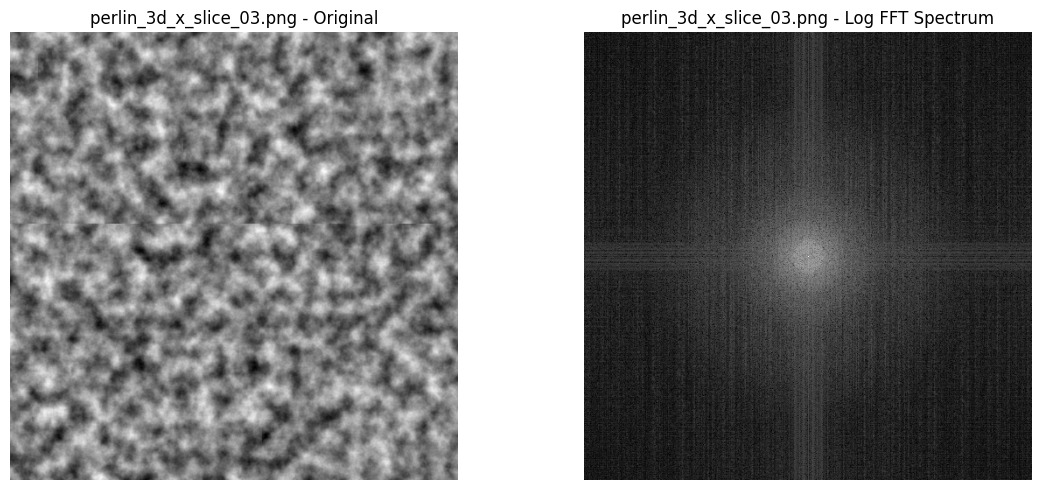

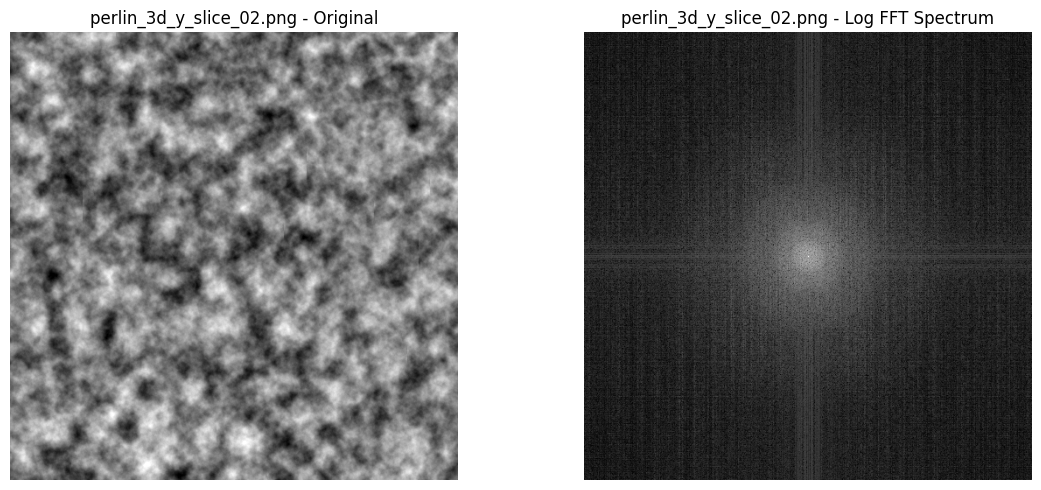

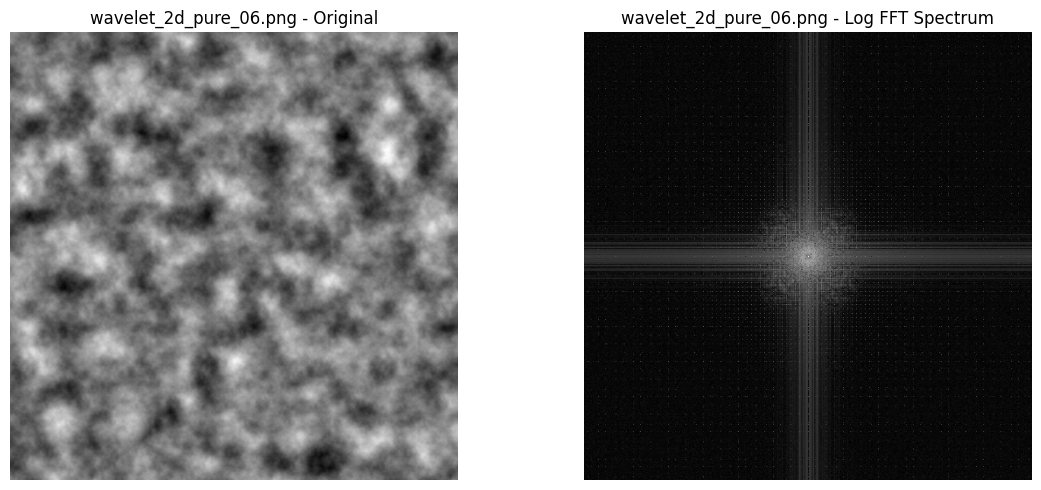

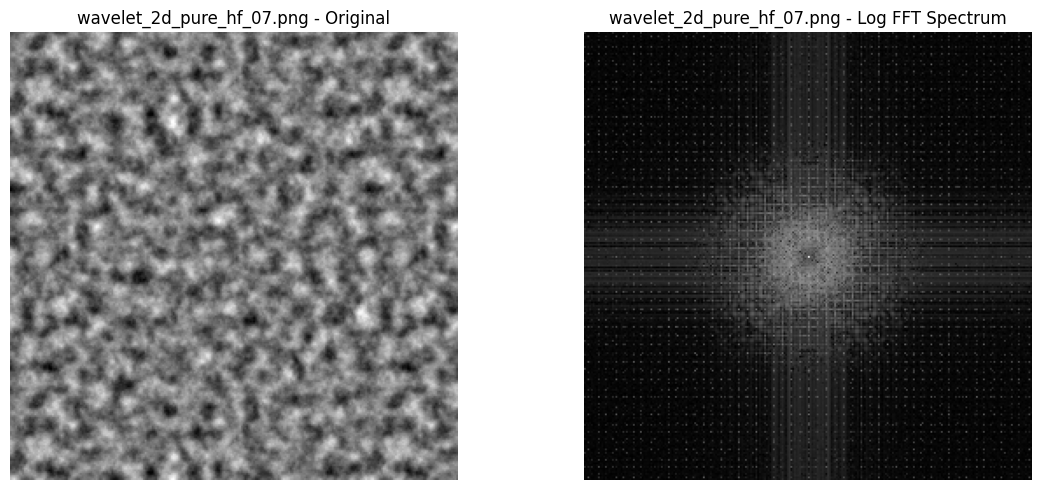

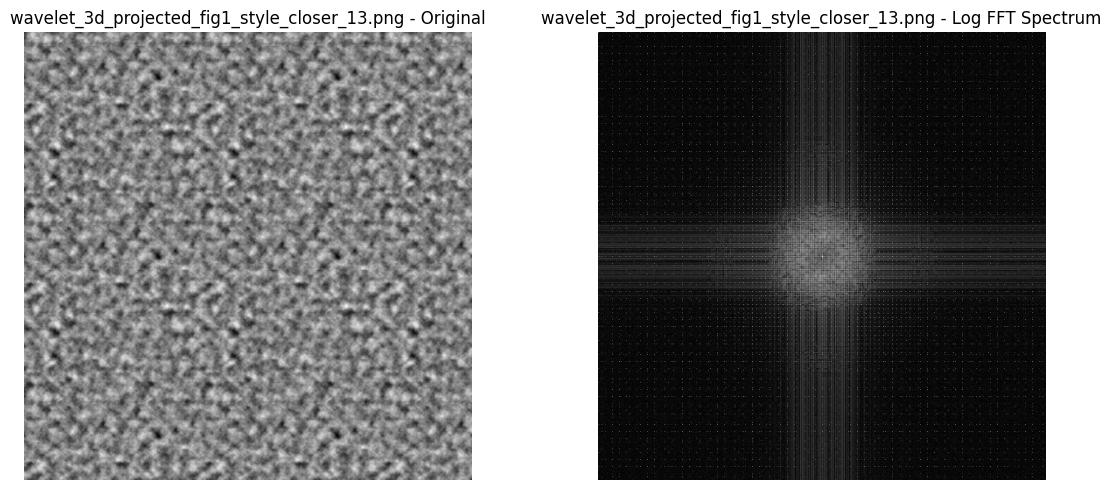

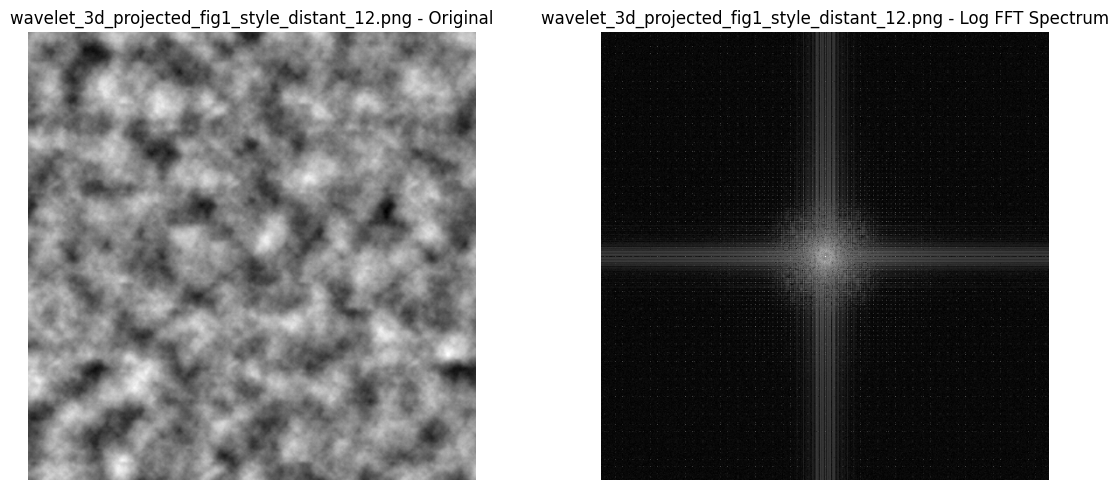

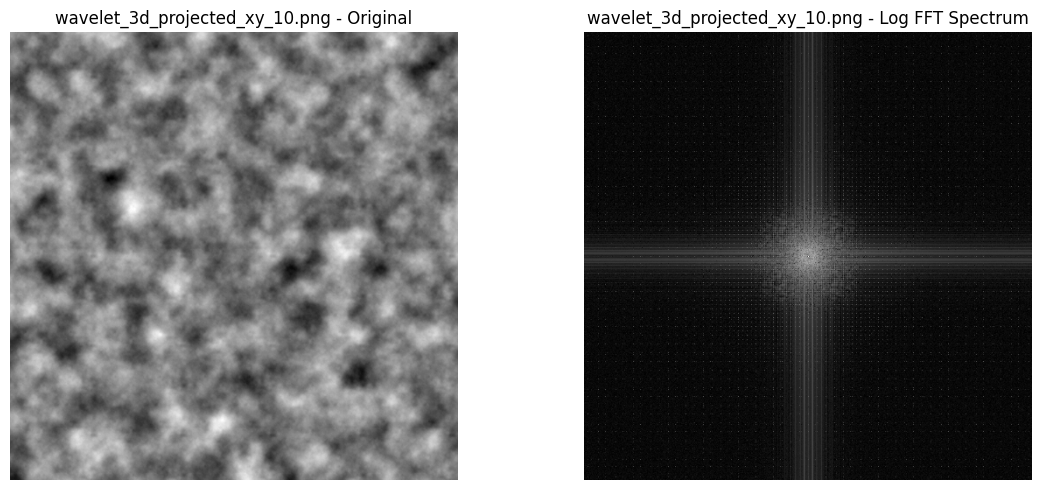

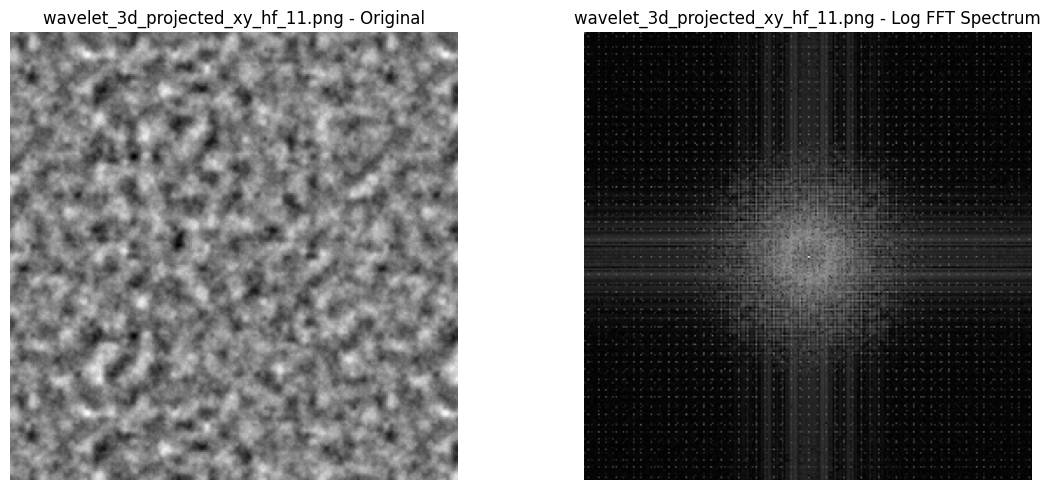

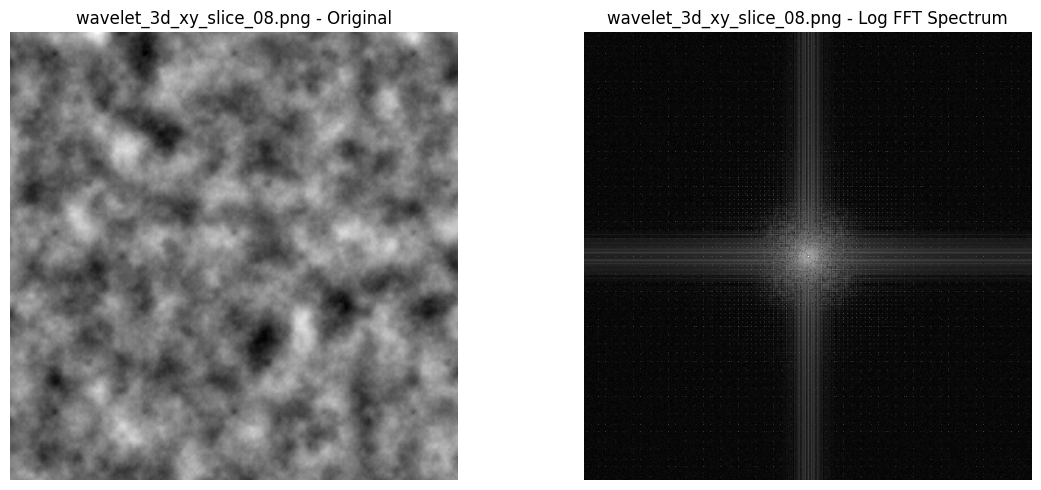

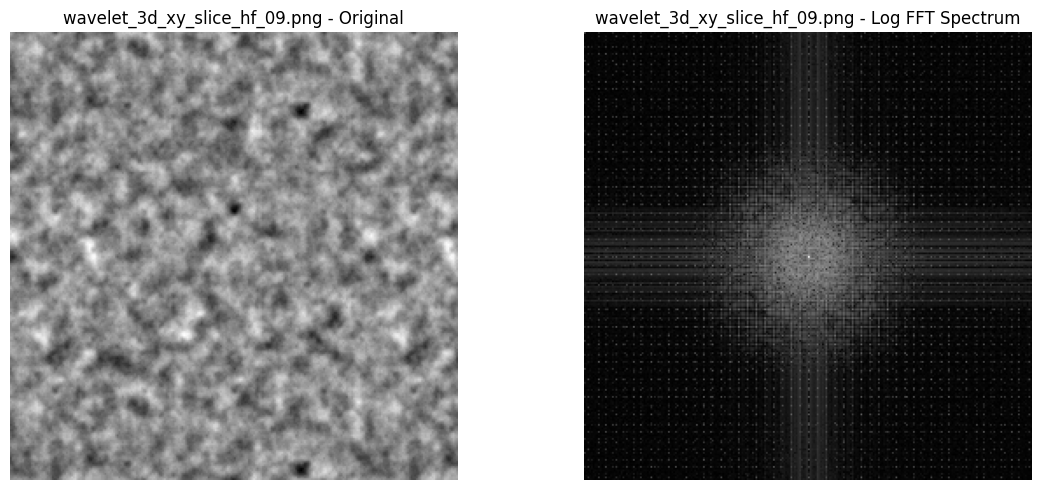

In [2]:
# 圖片資料夾路徑（修改為實際路徑）
image_dir = Path("../result")

# 所有 PNG 圖檔
image_files = sorted(image_dir.glob("*.png"))

# 傅立葉頻譜轉換 + log-scale
def compute_log_fft(image_path):
    img = Image.open(image_path).convert("L")  # 灰階
    img_array = np.array(img) / 255.0
    fft_image = fftshift(fft2(img_array))       # 頻譜中心對齊
    magnitude = np.abs(fft_image)
    log_magnitude = np.log1p(magnitude)         # log(1 + |F|)
    return img_array, log_magnitude

# 畫圖：左原圖，右頻譜圖
def plot_side_by_side(image_array, log_fft_array, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(image_array, cmap='gray')
    axs[0].set_title(f"{title} - Original")
    axs[0].axis("off")

    axs[1].imshow(log_fft_array, cmap='gray')
    axs[1].set_title(f"{title} - Log FFT Spectrum")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()

# 執行主流程：讀取 + 處理 + 視覺化
for path in image_files:
    image_arr, log_fft = compute_log_fft(path)
    plot_side_by_side(image_arr, log_fft, title=path.name)
